# Analysis part of the project.

This notebook is for the analysis part of the project. You will hopefully find : 
- Global convergence of the algorithms
- Local convergence of the algorithms
- Recognition Accuracy study
  - Performance comparison of the algorithms
  - Consistency of the algorithms

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Convergence study 

The convergence study consist of two parts :
1. Global convergence
2. Local convergence

The analysis will be done over the `.csv` files generated by `uo_nn_batch.m` file.

The structure of the `.csv` files is as follows :
```csv
num_target ;la     ;isd ;niter  ;tex    ;tr_acc ;te_acc ;L*       ;
```

Where :
- `num_target` : Target number for the SLNN
- `la` : Lambda value for the algorithms
- `isd` : Algorithm used (1 : GM, 2 : BFGS, 3 : SGM)
- `niter` : Number of iterations
- `tex` : Execution time
- `tr_acc` : Training accuracy
- `te_acc` : Testing accuracy
- `L*` : Value of the optimal loss function
  


### Global convergence 

Instructions : Analyse the global convergence of every algorithm and how this global convergence property depends on the value of the regularization parameter Lambda. Which combination algorithm-Lambda gives the best results in term of global convergence ? In particular, discuss the application to the SGM of the conditions for global convergence. 

In [65]:
# global convergence analysis for all algorithms 

csv_path = 'CSV\\uo_nn_batch_170644-440617-170647.csv'

# read the csv file and clean it up
df = pd.read_csv(csv_path, delimiter=';')
df = df.iloc[:, :-1]
df.columns = df.columns.str.strip()

# map algorithm names to their number in the isd column
algos = {1: 'GM', 2: 'BFGS', 3: 'SGM'}
df['algorithm'] = df['isd'].map(algos)

print(df.head())

   num_target    la  isd   niter     tex  tr_acc  te_acc            L*  \
0           1  0.00    1      33  0.1494     1.0     1.0  5.120000e-07   
1           1  0.00    2       6  0.0692     1.0     1.0  4.300000e-44   
2           1  0.00    3  125125  1.8357     1.0     1.0  1.320000e-05   
3           1  0.01    1      65  0.3671     1.0     1.0  2.700000e-02   
4           1  0.01    2      52  0.3796     1.0     1.0  2.700000e-02   

  algorithm  
0        GM  
1      BFGS  
2       SGM  
3        GM  
4      BFGS  


In [66]:
def compute_mean(df):
    # We want for each algorithm-lambda pair the mean over the 10 digits (0-9) of : 
    # niter, tex, tr_acc, te_acc and L* (the last one is the last value of the loss function)

    # group by algorithm and lambda
    grouped = df.groupby(['algorithm', 'la'])

    # compute the mean of the columns
    mean_df = grouped.mean()

    # drop the isd column
    mean_df = mean_df.drop(columns=['isd'])
    
    # drop the digit column
    mean_df = mean_df.drop(columns=['num_target'])

    return mean_df

print("Mean values for each algorithm-lambda pair:")
mean_df = compute_mean(df)
mean_df

Mean values for each algorithm-lambda pair:


niter      tex  tr_acc  te_acc        L*
algorithm la                                              
BFGS      0.00     27.0  0.19402    0.89    0.89  0.102400
          0.01     60.5  0.44359    1.00    0.99  0.045940
          0.10     27.9  0.29194    0.98    0.94  0.125040
GM        0.00    250.6  0.88613    0.89    0.90  0.102409
          0.01    149.3  0.69313    1.00    0.99  0.045940
          0.10     45.2  0.34235    0.98    0.94  0.125040
SGM       0.00  41200.0  0.59067    0.94    0.99  0.055829
          0.01   2762.5  0.07766    0.96    0.93  0.073250
          0.10   2137.5  0.06852    0.84    0.88  0.260400

In [67]:
def analyze_algorithm_performance():
    for algo in df['algorithm'].unique():
        print(f"\nAnalysis for {algo}:")
        algo_data = df[df['algorithm'] == algo]
        
        # Correlation between lambda and loss
        correlation = stats.pearsonr(algo_data['la'], algo_data['L*'])
        print(f"Correlation between Lambda and Loss: {correlation[0]:.4f} (p-value: {correlation[1]:.4f})")
        
        # Average convergence metrics
        print(f"Average execution time: {algo_data['tex'].mean():.4f}")
        print(f"Average training accuracy: {algo_data['tr_acc'].mean():.4f}")
        print(f"Average testing accuracy: {algo_data['te_acc'].mean():.4f}")
        print(f"Average number of iterations: {algo_data['niter'].mean():.4f}")
        print(f"Average time of execution: {algo_data['tex'].mean():.4f}")
        print(f"Average time per iteration: {(algo_data['tex'].mean() / algo_data['niter'].mean())*1000:.3f} ms")

analyze_algorithm_performance()


Analysis for GM:
Correlation between Lambda and Loss: 0.1749 (p-value: 0.3553)
Average execution time: 0.6405
Average training accuracy: 0.9567
Average testing accuracy: 0.9433
Average number of iterations: 148.3667
Average time of execution: 0.6405
Average time per iteration: 4.317 ms

Analysis for BFGS:
Correlation between Lambda and Loss: 0.1749 (p-value: 0.3552)
Average execution time: 0.3099
Average training accuracy: 0.9567
Average testing accuracy: 0.9400
Average number of iterations: 38.4667
Average time of execution: 0.3099
Average time per iteration: 8.055 ms

Analysis for SGM:
Correlation between Lambda and Loss: 0.5588 (p-value: 0.0013)
Average execution time: 0.2456
Average training accuracy: 0.9133
Average testing accuracy: 0.9333
Average number of iterations: 15366.6667
Average time of execution: 0.2456
Average time per iteration: 0.016 ms


In [68]:
def find_best_combo(mean_df):
    # Find the row with the minimum loss (L*)
    best_combo = mean_df.loc[mean_df['L*'].idxmin()]
    
    # Extract the algorithm and lambda pair
    algo_lambda_pair = best_combo.name
    
    # Print the results in a more readable format
    print(f"Best combination of algorithm and lambda: {algo_lambda_pair}")
    print("Details:")
    print(best_combo)

# Assuming mean_df is already defined
best_combo = find_best_combo(mean_df)

Best combination of algorithm and lambda: ('BFGS', 0.01)
Details:
niter     60.50000
tex        0.44359
tr_acc     1.00000
te_acc     0.99000
L*         0.04594
Name: (BFGS, 0.01), dtype: float64


In [69]:
def find_best_lambda_for_each_algorithm(mean_df):
    # Get the unique algorithms
    algorithms = mean_df.index.get_level_values('algorithm').unique()
    
    for algo in algorithms:
        # Filter the DataFrame for the current algorithm
        algo_df = mean_df.loc[algo]
        
        # Find the row with the minimum loss (L*)
        best_lambda_row = algo_df.loc[algo_df['L*'].idxmin()]
        
        # Extract the lambda value
        best_lambda = best_lambda_row.name
        
        # Print the results in a more readable format
        print(f"Best lambda for algorithm {algo}: {best_lambda}")
        print("Details:")
        print(best_lambda_row)
        print()

# Assuming mean_df is already defined
find_best_lambda_for_each_algorithm(mean_df)

Best lambda for algorithm BFGS: 0.01
Details:
niter     60.50000
tex        0.44359
tr_acc     1.00000
te_acc     0.99000
L*         0.04594
Name: 0.01, dtype: float64

Best lambda for algorithm GM: 0.01
Details:
niter     149.30000
tex         0.69313
tr_acc      1.00000
te_acc      0.99000
L*          0.04594
Name: 0.01, dtype: float64

Best lambda for algorithm SGM: 0.0
Details:
niter     41200.000000
tex           0.590670
tr_acc        0.940000
te_acc        0.990000
L*            0.055829
Name: 0.0, dtype: float64



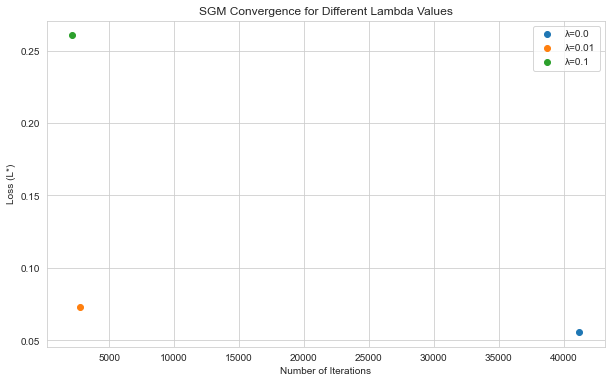

Optimal Lambda for SGM: 0.0
Details:
Achieved Test Accuracy: 0.99
Number of Iterations: 41200.0
Execution Time: 0.59067


In [70]:

def analyze_sgm(df):
    # Reset the index to access 'algorithm' as a column
    df_reset = df.reset_index()
    
    # Filter the DataFrame for SGM algorithm
    sgm_data = df_reset[df_reset['algorithm'] == 'SGM']
    
    # Analyze SGM convergence for different lambda values
    plt.figure(figsize=(10, 6))
    for la in sgm_data['la'].unique():
        lambda_data = sgm_data[sgm_data['la'] == la]
        plt.scatter(lambda_data['niter'], lambda_data['L*'], label=f'λ={la}')
    
    plt.xlabel('Number of Iterations')
    plt.ylabel('Loss (L*)')
    plt.title('SGM Convergence for Different Lambda Values')
    plt.legend()
    plt.show()
    
    # Find optimal lambda for SGM
    best_sgm = sgm_data.loc[sgm_data['te_acc'].idxmax()]
    print(f"Optimal Lambda for SGM: {best_sgm['la']}")
    print("Details:")
    print(f"Achieved Test Accuracy: {best_sgm['te_acc']}")
    print(f"Number of Iterations: {best_sgm['niter']}")
    print(f"Execution Time: {best_sgm['tex']}")

analyze_sgm(mean_df)